<a href="https://colab.research.google.com/github/mgersins-design/Machine-Learning/blob/main/Linear_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/D3.csv'
sample = sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [ ]:
x1 = sample.iloc[:, 0]
x2 = sample.iloc[:, 1]
x3 = sample.iloc[:, 2]
y = sample.iloc[:, 3]
m = len(x1)
n = len(y)

print('X1 = ', x1[: 5])
print('X2 = ', x2[: 5])
print('X3 = ', x3[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

X1 =  0    0.000000
1    0.040404
2    0.080808
3    0.121212
4    0.161616
Name: X1, dtype: float64
X2 =  0    3.440000
1    0.134949
2    0.829899
3    1.524848
4    2.219798
Name: X2, dtype: float64
X3 =  0    0.440000
1    0.888485
2    1.336970
3    1.785455
4    2.233939
Name: X3, dtype: float64
y =  0    4.387545
1    2.679650
2    2.968490
3    3.254065
4    3.536375
Name: Y, dtype: float64
m =  100
n =  100


In [ ]:
x0 = np.ones((m, 1))
x1 = np.array(x1).reshape(m, 1)
x2 = np.array(x2).reshape(m, 1)
x3 = np.array(x3).reshape(m, 1)

x_01 = np.hstack((x0, x1))
x_02 = np.hstack((x0, x2))
x_03 = np.hstack((x0, x3))



print(x_01[: 5], x_02[: 5], x_03[: 5])

theta = np.zeros((2))
print(theta)

[[1.         0.        ]
 [1.         0.04040404]
 [1.         0.08080808]
 [1.         0.12121212]
 [1.         0.16161616]] [[1.         3.44      ]
 [1.         0.1349495 ]
 [1.         0.82989899]
 [1.         1.52484848]
 [1.         2.21979798]] [[1.         0.44      ]
 [1.         0.88848485]
 [1.         1.3369697 ]
 [1.         1.78545454]
 [1.         2.23393939]]
[0. 0.]


In [ ]:
def compute_cost(x, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 4D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = x.dot(theta) # Output: (100,1)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
cost_x1 = compute_cost(x_01, y, theta)
cost_x2 = compute_cost(x_02, y, theta)
cost_x3 = compute_cost(x_03, y, theta)
print('The costs for given values of the thetas =', cost_x1, cost_x2, cost_x3)

The costs for given values of the thetas = 5.524438459196242 5.524438459196242 5.524438459196242


In [ ]:
def gradient_descent(x, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(x, y, theta)

    return theta, cost_history

In [ ]:
theta = [0., 0.]
iterations = 1500
alpha = 0.03

theta_x1, cost_history_x1 = gradient_descent(x_01, y, theta, alpha, iterations)
print('Final value of theta =', theta_x1)
print('cost_history =', cost_history_x1)

theta_x2, cost_history_x2 = gradient_descent(x_02, y, theta, alpha, iterations)
print('Final value of theta =', theta_x2)
print('cost_history =', cost_history_x2)

theta_x3, cost_history_x3 = gradient_descent(x_03, y, theta, alpha, iterations)
print('Final value of theta =', theta_x3)
print('cost_history =', cost_history_x3)

Final value of theta = [ 5.92768519 -2.03823399]
cost_history = [5.40240885 5.30268813 5.21806121 ... 0.98499309 0.98499309 0.98499309]
Final value of theta = [0.73604006 0.55761554]
cost_history = [4.88901283 4.46596512 4.18427698 ... 3.59936602 3.59936602 3.59936602]
Final value of theta = [ 2.8713183  -0.52044183]
cost_history = [5.19495378 4.96883046 4.81248407 ... 3.62945113 3.62945113 3.62945113]


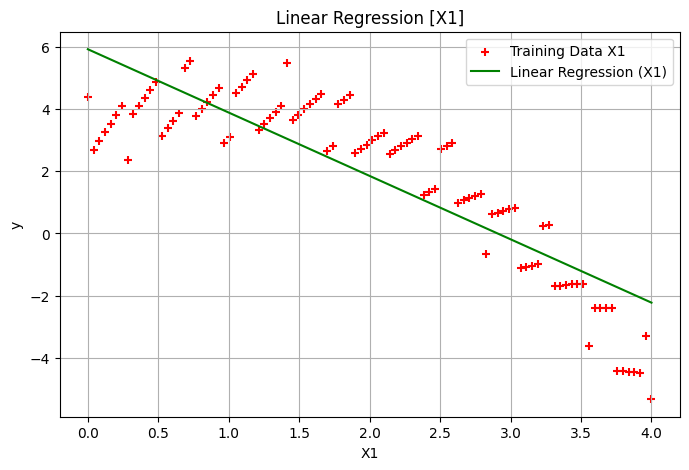

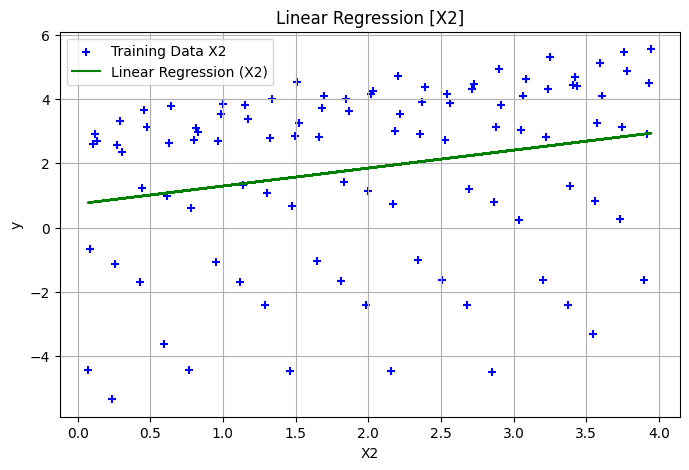

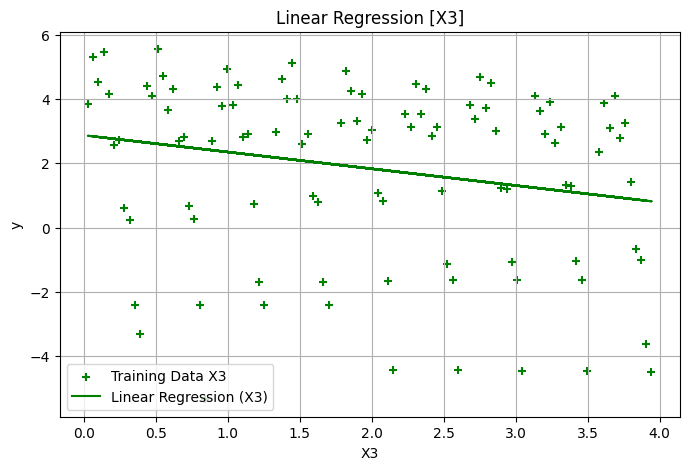

In [ ]:
# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Plot for X1
plt.figure(figsize=(8,5))
plt.scatter(x_01[:, 1], y, color='red', marker='+', label='Training Data X1')
plt.plot(x_01[:, 1], x_01.dot(theta_x1), color='green', label='Linear Regression (X1)')
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Linear Regression [X1]')
plt.legend()
plt.show()

# Plot for X2
plt.figure(figsize=(8,5))
plt.scatter(x_02[:, 1], y, color='blue', marker='+', label='Training Data X2')
plt.plot(x_02[:, 1], x_02.dot(theta_x2), color='green', label='Linear Regression (X2)')
plt.grid(True)
plt.xlabel('X2')
plt.ylabel('y')
plt.title('Linear Regression [X2]')
plt.legend()
plt.show()

# Plot for X3
plt.figure(figsize=(8,5))
plt.scatter(x_03[:, 1], y, color='green', marker='+', label='Training Data X3')
plt.plot(x_03[:, 1], x_03.dot(theta_x3), color='green', label='Linear Regression (X3)')
plt.grid(True)
plt.xlabel('X3')
plt.ylabel('y')
plt.title('Linear Regression [X3]')
plt.legend()
plt.show()

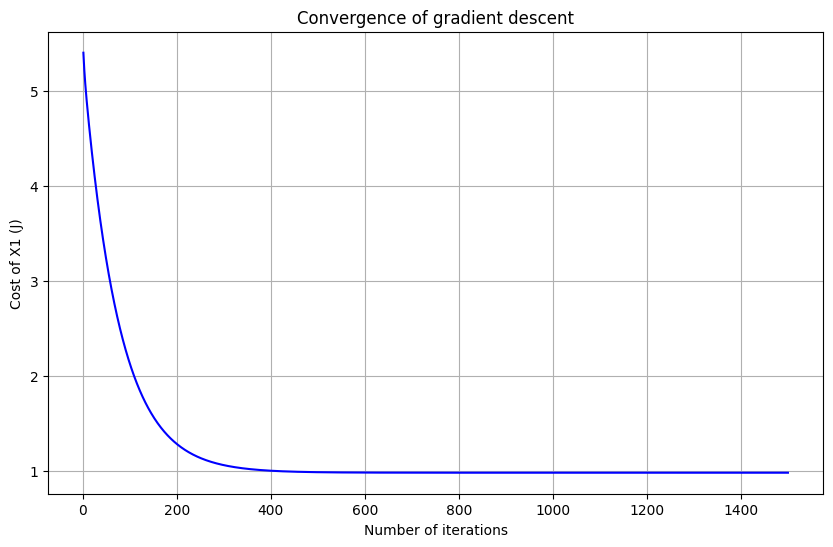

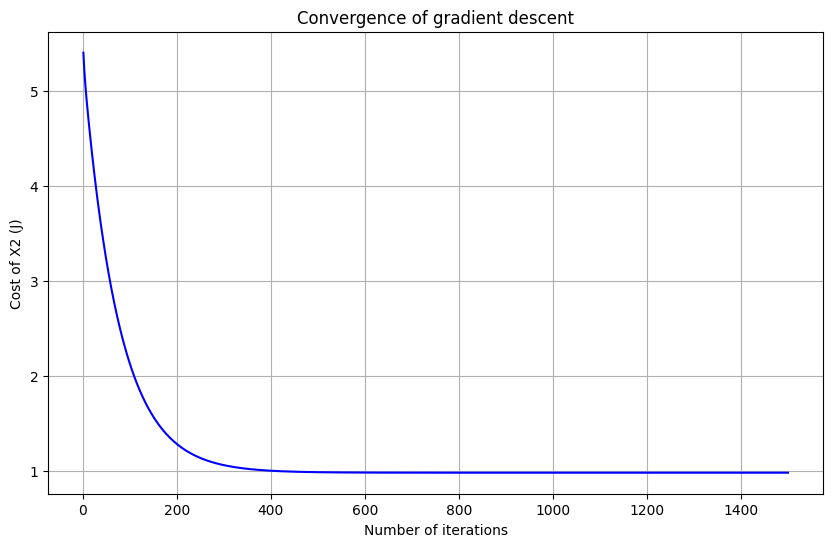

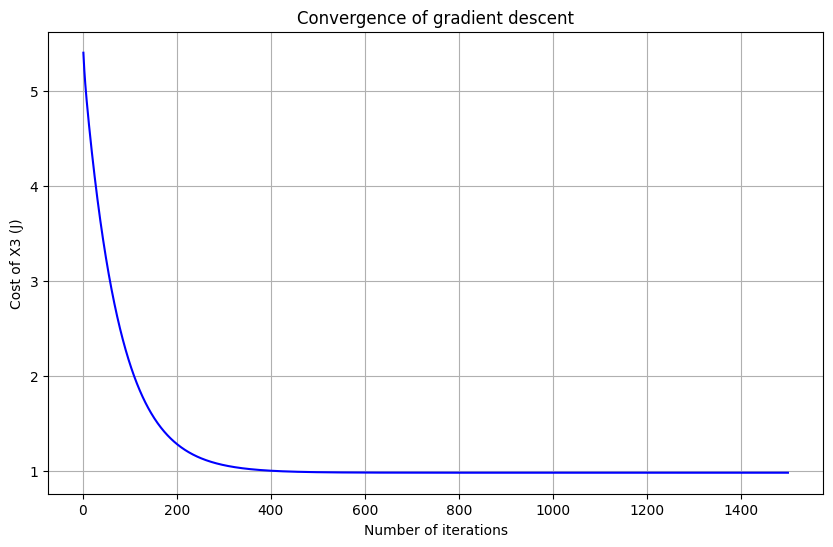

In [ ]:
plt.figure
plt.plot(range(1, iterations + 1), cost_history_x1, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost of X1 (J)')
plt.title('Convergence of gradient descent')
# Show the plot
plt.show()

plt.figure
plt.plot(range(1, iterations + 1), cost_history_x1, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost of X2 (J)')
plt.title('Convergence of gradient descent')
# Show the plot
plt.show()

plt.figure
plt.plot(range(1, iterations + 1), cost_history_x1, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost of X3 (J)')
plt.title('Convergence of gradient descent')
# Show the plot
plt.show()